In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
species = !ls ../../data/nathan

In [3]:
dmr_annotate_path = '../../data/nathan/human/Human_DMR_rms_results_collapsed_filtered.bed'

In [4]:
dmrs = pd.read_csv(dmr_annotate_path, sep='\t', header=None)
dmrs['shortname'] = dmrs[0] + ':' + dmrs[1].astype(str) + ':' + dmrs[2].astype(str)
dmrs = dmrs.set_index('shortname')

In [5]:
dmr_level_0_all_path = '../../data/nathan/human/human_dmrs_ortho_in_four_species_hg38.bed'

In [6]:
!head $dmr_annotate_path

chr1	14699	14710	human_orig_1
chr1	54489	54649	human_orig_2
chr1	56298	56305	human_orig_3
chr1	87723	87754	human_orig_4
chr1	91059	91550	human_orig_5
chr1	92741	92763	human_orig_6
chr1	94860	95073	human_orig_7
chr1	99579	99719	human_orig_8
chr1	109105	109176	human_orig_9
chr1	123983	124108	human_orig_10


In [7]:
dmrs_level_0_all = pd.read_csv(dmr_level_0_all_path,
                              sep='\t',
                              header=None)
dmrs_level_0_all['shortname'] = (dmrs_level_0_all[0] + ':'
                                 + dmrs_level_0_all[1].astype(str) +':'
                                 + dmrs_level_0_all[2].astype(str))
dmrs_level_0_all = dmrs_level_0_all.set_index('shortname')

In [9]:
dmrs_level_0_all.head()

,0,1,2,3
shortname,,,,
chr10:100005980:100006011,chr10,100005980,100006011,human_orig_161429
chr10:100006180:100006425,chr10,100006180,100006425,human_orig_161430
chr10:100008266:100008954,chr10,100008266,100008954,human_orig_161434
chr10:100010417:100010666,chr10,100010417,100010666,human_orig_161435
chr10:100011400:100011404,chr10,100011400,100011404,human_orig_161436


In [7]:
dmr_level_0_p_path = '../../data/nathan/human/human_dmrs_primate_seq_cons_not_in_mouse_hg38.bed'

In [8]:
dmrs_level_0_p = pd.read_csv(dmr_level_0_p_path,
                              sep='\t',
                              header=None)
dmrs_level_0_p['shortname'] = (dmrs_level_0_p[0] + ':'
                                 + dmrs_level_0_p[1].astype(str) + ':'
                                 + dmrs_level_0_p[2].astype(str))
dmrs_level_0_p = dmrs_level_0_p.set_index('shortname')

In [9]:
dmrs['mammal_level0'] = dmrs.index.isin(dmrs_level_0_all.index)
dmrs['primate_level0'] = dmrs.index.isin(dmrs_level_0_p.index)

# get human specific sequences

In [10]:
spec_genome = {
                'human' : 'hg38', 
                'macaque' : 'rhemac10',
                'marmoset' : 'caljac4',
                'mouse' : 'mm10'
              }

In [11]:
print('??')

??


In [12]:
import sys
sys.path.insert(0, '../../scripts/')

In [13]:
from common_funcs import *

In [14]:
import numpy as np

# get human specific dmrs

In [15]:
!pwd

/projects/ps-renlab2/earmand/projects/mammalian_motor_cortex_comparative/dmr_fig/notebooks/processing


In [16]:
unmapped_path = '../../data/nathan/human/hg38_to_{}_unmapped.bed'

In [17]:
missing_regions = []
for specie in species[1:]:
    check = pd.read_csv(unmapped_path.format(spec_genome[specie]), sep='\t')
    check = check.loc[[i % 2 == 0 for i in range(check.shape[0])]]
    check = check.reset_index()
    regions = check.level_0 + ':' + check.level_1.astype(int).astype(str) + ':' + check.level_2.astype(int).astype(str)
    missing_regions.append(regions.values)

In [18]:
missing_regions

[array(['chr1:94860:95073', 'chr1:591101:591427', 'chr1:600606:600636',
        ..., 'chrY:56734250:56734405', 'chrY:56858113:56858212',
        'chrY:56880137:56880405'], dtype=object),
 array(['chr1:87723:87754', 'chr1:94860:95073', 'chr1:260096:260117', ...,
        'chrY:56710387:56710627', 'chrY:56734250:56734405',
        'chrY:56885860:56886107'], dtype=object),
 array(['chr1:54489:54649', 'chr1:56298:56305', 'chr1:87723:87754', ...,
        'chrY:56866723:56866730', 'chrY:56880137:56880405',
        'chrY:56885860:56886107'], dtype=object)]

In [19]:
human_specific = list_intersection(missing_regions)

In [20]:
len(human_specific)

54829

In [21]:
dmrs.head()

,0,1,2,3,mammal_level0,primate_level0
shortname,,,,,,
chr1:14699:14710,chr1,14699,14710,human_orig_1,False,False
chr1:54489:54649,chr1,54489,54649,human_orig_2,False,False
chr1:56298:56305,chr1,56298,56305,human_orig_3,False,False
chr1:87723:87754,chr1,87723,87754,human_orig_4,False,False
chr1:91059:91550,chr1,91059,91550,human_orig_5,False,False


In [22]:
dmrs['human_specific'] = dmrs.index.isin(human_specific)

In [23]:
dmrs['human_specific'].sum()

54829

In [24]:
check = pd.read_csv(unmapped_path.format(spec_genome['marmoset']), sep='\t')

In [25]:
check = check.loc[[i % 2 == 0 for i in range(check.shape[0])]]

In [26]:
check.head().reset_index()['level_1'].astype(int).astype(str)

0     87723
1     94860
2    260096
3    268051
4    600606
Name: level_1, dtype: object

In [27]:
dmrs.head()

,0,1,2,3,mammal_level0,primate_level0,human_specific
shortname,,,,,,,
chr1:14699:14710,chr1,14699,14710,human_orig_1,False,False,False
chr1:54489:54649,chr1,54489,54649,human_orig_2,False,False,False
chr1:56298:56305,chr1,56298,56305,human_orig_3,False,False,False
chr1:87723:87754,chr1,87723,87754,human_orig_4,False,False,False
chr1:91059:91550,chr1,91059,91550,human_orig_5,False,False,False


In [28]:
specie_dmr_path = '../../data/dmr_wei_tian/{}_hypomethylated_cell_types.tsv'

In [29]:
human_hypo = pd.read_csv(specie_dmr_path.format('human'), sep='\t')

In [30]:
human_hypo.shape

(3254482, 5)

In [31]:
human_hypo['shortname'] = (human_hypo['#chr'] + ':'
                           + human_hypo['start'].astype(str) + ':'
                          + human_hypo['end'].astype(str))

In [32]:
human_hypo = human_hypo.set_index('shortname')

In [33]:
def read_ref(paths, genomes, specie):
    df = pd.read_csv(paths[0].format(genomes[specie]), sep='\t', 
                    header=None)
    if specie in ['marmoset', 'macaque']:
        p_names = pd.read_csv(paths[1].format(genomes[specie]), sep='\t',
                              header=None)
        df = pd.concat([df, p_names], axis=0)
    df['shortname'] = (df[0] +  ':' +
                        df[1].astype(str) +  ':'
                       +df[2].astype(str))
    df = df.set_index('shortname')
    return df

In [34]:
mammal_ref_path = '../../data/nathan/human/human_dmrs_ortho_in_four_species_{}.bed'
primate_ref_path = '../../data/nathan/human/human_dmrs_primate_seq_cons_not_in_mouse_{}.bed'

In [35]:
ref_paths =[mammal_ref_path, primate_ref_path]

In [36]:
hypo_path = '../../data/dmr_wei_tian/{}_hypomethylated_cell_types.tsv'

In [37]:
def read_hypo(path, specie):
    df = pd.read_csv(path.format(specie), sep='\t')
    if specie == 'macaque':
        df['shortname'] = ('chr' + df['#chr'].astype(str) +':'
                               + df['start'].astype(str) + ':'
                              + df['end'].astype(str))
    else:
        df['shortname'] = (df['#chr'].astype(str) +':'
                       + df['start'].astype(str) + ':'
                      + df['end'].astype(str))
    df = df.set_index('shortname')
    return df

In [38]:
human_hypo = human_hypo.loc[human_hypo.index.isin(dmrs.index)]
human_hypo['dmr_name'] = dmrs.loc[human_hypo.index, 3]
human_hypo = human_hypo.set_index('dmr_name')

In [39]:
human_hypo['hypomethylated_samples']

dmr_name
human_orig_1                      Vsc
human_orig_2            Astro,ODC,OPC
human_orig_3          Astro,L6-CT,L6b
human_orig_4                      OPC
human_orig_5                ODC,Astro
                           ...       
human_orig_1361954                NaN
human_orig_1361955                ODC
human_orig_1361956                ODC
human_orig_1361957                NaN
human_orig_1361958                ODC
Name: hypomethylated_samples, Length: 1361958, dtype: object

In [40]:
def get_cell_types(cell_type_str):
    if type(cell_type_str) != str:
        return [None]
    return cell_type_str.strip(',').split(',')

In [41]:
bedtools_path = '/projects/ps-renlab2/earmand/conda_envs/bedtools/bin/bedtools'

In [42]:
dmr_ref = '../../data/working_dmr/{}_dmr_ortho_ref.bed'

In [43]:
for specie in species[1:]:
    m_path = mammal_ref_path.format(spec_genome[specie])
    p_path = primate_ref_path.format(spec_genome[specie])
    out = dmr_ref.format(specie)
    
    !cat $m_path > $out    
    if specie in species[1:3]:
        !cat $p_path >> $out

In [44]:
# fill empty values in hypomethylated
# for specie in species:
#     hypo = pd.read_csv(hypo_path.format(specie),sep='\t')
#     hypo.fillna('none').to_csv(hypo_path.format(specie),
#                                sep='\t',
#                                index=False)

# get human dmr x cell

In [45]:
human_hypo = human_hypo.fillna('none')

In [46]:
types = [ get_cell_types(i) for i in human_hypo.hypomethylated_samples]

In [47]:
cell_types = np.unique(np.concatenate(types))

In [48]:
cell_types

array(['Astro', 'CLA', 'L23', 'L4', 'L5-ET', 'L5-IT', 'L6-CT', 'L6-IT',
       'L6b', 'Lamp5', 'MG', 'NP', 'ODC', 'OPC', 'Pvalb-BC', 'Pvalb-ChC',
       'Sncg', 'Sst', 'Vip', 'Vsc', 'none'], dtype='<U9')

In [49]:
def check_str(a, string):
    return string in str(a)

In [50]:
hyper_cell_types = {}
hypo_cell_types = {}
for clust in cell_types:
    hyper_cell_types[clust] =human_hypo.hypermethylated_samples.apply(check_str, string=clust)
    hypo_cell_types[clust] =human_hypo.hypomethylated_samples.apply(check_str, string=clust)    

In [51]:
hyper_types = pd.DataFrame(hyper_cell_types)
hypo_types = pd.DataFrame(hypo_cell_types)

In [52]:
hyper_types.to_csv('../../data/outs/human_cell_type_hyper_dmr_info.tsv', sep='\t')
hypo_types.to_csv('../../data/outs/human_cell_type_hypo_dmr_info.tsv', sep='\t')

In [56]:
cell_dmrs = hyper_types + hypo_types > 0

In [53]:
hypo_types.sum()

Astro        337219
CLA          166783
L23          450943
L4           284453
L5-ET        105673
L5-IT        318642
L6-CT        222277
L6-IT        225059
L6b          265973
Lamp5        129817
MG           634773
NP            71106
ODC          604819
OPC          268043
Pvalb-BC      99968
Pvalb-ChC     65965
Sncg          76508
Sst           75577
Vip           93694
Vsc          447041
none           6002
dtype: int64

In [57]:
cell_dmrs.sum()

Astro         689726
CLA           197637
L23           867760
L4            533195
L5-ET         110542
L5-IT         461965
L6-CT         270189
L6-IT         439141
L6b           303530
Lamp5         318669
MG            892692
NP            129256
ODC          1048399
OPC           349794
Pvalb-BC      472942
Pvalb-ChC     101557
Sncg          134070
Sst           467751
Vip           409910
Vsc           572737
none          377115
dtype: int64

In [59]:
cell_dmrs.head()

,Astro,CLA,L23,L4,L5-ET,L5-IT,L6-CT,L6-IT,L6b,Lamp5,...,NP,ODC,OPC,Pvalb-BC,Pvalb-ChC,Sncg,Sst,Vip,Vsc,none
dmr_name,,,,,,,,,,,,,,,,,,,,,
human_orig_1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
human_orig_2,True,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
human_orig_3,True,False,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
human_orig_4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
human_orig_5,True,True,False,True,False,False,False,False,False,True,...,False,True,False,True,False,False,True,True,False,False


# species level level 0

In [73]:
l0_path  = '../../data/nathan/human/hg38_to_{}_to_hg38.bed'

In [75]:
# l0_regions = []
for specie in species[1:]:
    check = pd.read_csv(l0_path.format(spec_genome[specie]), sep='\t', header=None)
    # check = check.loc[[i % 2 == 0 for i in range(check.shape[0])]]
    # check = check.reset_index()
    
    # regions = check.level_0 + ':' + check.level_1.astype(int).astype(str) + ':' + check.level_2.astype(int).astype(str)
    cell_dmrs['level0_{}'.format(specie)] = cell_dmrs.index.isin(check[3])

In [76]:
cell_dmrs.to_csv('../../data/outs/human_cell_type_dmr_info.tsv', sep='\t')

In [61]:
dmrs = dmrs.set_index(3)

In [ ]:
cell_dmrs = cell_dmrs.join('

In [62]:
dmrs.head()

,0,1,2,mammal_level0,primate_level0,human_specific
3,,,,,,
human_orig_1,chr1,14699,14710,False,False,False
human_orig_2,chr1,54489,54649,False,False,False
human_orig_3,chr1,56298,56305,False,False,False
human_orig_4,chr1,87723,87754,False,False,False
human_orig_5,chr1,91059,91550,False,False,False


In [54]:
out_intersect = '../../data/working_dmr/{}_intersect_ref_hypo.bed'

In [55]:
hypo_path

'../../data/dmr_wei_tian/{}_hypomethylated_cell_types.tsv'

In [56]:
# use bedtools to get hypo/hyper_samples
for specie in species[1:]:
    ref = dmr_ref.format(specie)
    hypo = hypo_path.format(specie)
    out = out_intersect.format(specie)
    print(specie)
    !wc -l $hypo
    bed_call = ("tail -n+2 {} | ".format(hypo)
                + bedtools_path + 
                ' intersect -wao -f .05 -a {} -b stdin '.format(ref) + 
               '> {}'.format(out))
    !$bed_call
    # print(bed_call)

macaque
3289325 ../../data/dmr_wei_tian/macaque_hypomethylated_cell_types.tsv
marmoset
2296631 ../../data/dmr_wei_tian/marmoset_hypomethylated_cell_types.tsv
mouse
3445525 ../../data/dmr_wei_tian/mouse_hypomethylated_cell_types.tsv


In [57]:
for specie in species[1:]:
    ref = dmr_ref.format(specie)
    out = out_intersect.format(specie)
    print(specie)
    !wc -l $out
    # !wc -l $ref
#     

macaque
1165893 ../../data/working_dmr/macaque_intersect_ref_hypo.bed
marmoset
1136034 ../../data/working_dmr/marmoset_intersect_ref_hypo.bed
mouse
635354 ../../data/working_dmr/mouse_intersect_ref_hypo.bed


In [58]:
hypo_ref = pd.read_csv(out_intersect.format('marmoset'), sep='\t', header=None)

In [59]:
hypo_ref = hypo_ref.loc[hypo_ref[4] != '.']

In [60]:
print(hypo_ref.shape)
hypo_ref.head()

(542476, 10)


,0,1,2,3,4,5,6,7,8,9
0,chr12,90319364,90319395,human_orig_161429,chr12,90319023,90319812,"L6-IT,L4,L5-IT","ODC,Sst,Vip,OPC,Vsc,Lamp5,Pvalb-BC",31
1,chr12,90319570,90319812,human_orig_161430,chr12,90319023,90319812,"L6-IT,L4,L5-IT","ODC,Sst,Vip,OPC,Vsc,Lamp5,Pvalb-BC",242
2,chr12,90322785,90323460,human_orig_161434,chr12,90323155,90324084,"L6-CT,L6b,NP,MG,Astro",L23,305
3,chr12,90324995,90325242,human_orig_161435,chr12,90325138,90325505,"ODC,Astro,Vip,MG,Pvalb-ChC","L23,L4,L6-IT",104
7,chr12,90341627,90342173,human_orig_161451,chr12,90341375,90341823,none,"ODC,OPC,Vsc,MG",196


In [61]:
a = hypo_ref.set_index(3)

In [62]:
a.index.value_counts()

human_orig_1307932    6
human_orig_1298551    5
human_orig_707673     5
human_orig_438951     5
human_orig_593329     5
                     ..
human_orig_699669     1
human_orig_699666     1
human_orig_610916     1
human_orig_610915     1
human_orig_1361522    1
Name: 3, Length: 504924, dtype: int64

In [63]:
a[8] = a[8] +','

In [64]:
# get_cell_types(''.join(a[8]['human_orig_464870']))

In [65]:
hypo_ref = hypo_ref.groupby(3)

In [66]:
hypo_ref.get_group('human_orig_161429')

,0,1,2,3,4,5,6,7,8,9
0,chr12,90319364,90319395,human_orig_161429,chr12,90319023,90319812,"L6-IT,L4,L5-IT","ODC,Sst,Vip,OPC,Vsc,Lamp5,Pvalb-BC",31


# deal with duplicate interesections
- dealt with by requireing 50% overlap

In [67]:
human_hypo.head()

,#chr,start,end,hypermethylated_samples,hypomethylated_samples
dmr_name,,,,,
human_orig_1,chr1,14699,14710,none,Vsc
human_orig_2,chr1,54489,54649,Pvalb-BC,"Astro,ODC,OPC"
human_orig_3,chr1,56298,56305,Pvalb-BC,"Astro,L6-CT,L6b"
human_orig_4,chr1,87723,87754,none,OPC
human_orig_5,chr1,91059,91550,"L4,Vip,Pvalb-BC,Sst,CLA,Lamp5","ODC,Astro"


In [68]:
def get_cell_types(cell_type_str):
    if type(cell_type_str) != str:
        return [None]
    return cell_type_str.strip(',').split(',')

In [69]:
level_2_clusts_hypo = {}
level_2_clusts_hyper = {}
actual_level1 = {}
for specie in species[1:]:
    hypo_ref = pd.read_csv(out_intersect.format(specie), sep='\t', header=None)
    hypo_ref = hypo_ref.loc[hypo_ref[4] != '.']
    hypo_ref = hypo_ref.set_index(3)
    hypo_ref[8] = hypo_ref[8] + ','
    hypo_ref[7] = hypo_ref[7] + ','
    
    print(hypo_ref.shape)
    human_use = human_hypo.loc[human_hypo.index.isin(hypo_ref.index)]
    actual_level1[specie] = human_use.index
    
    level_2_clusts_hypo[specie] = {
                     name :
                    np.intersect1d(
                    get_cell_types(human_hypo['hypomethylated_samples'][name]),
                    get_cell_types(''.join(hypo_ref[8][name]))
                                  ) 
                                   for name in np.unique(human_use.index)
                    }
    level_2_clusts_hyper[specie] = {
                    name :
                    np.intersect1d(
                    get_cell_types(human_hypo['hypermethylated_samples'][name]),
                    get_cell_types(''.join(hypo_ref[7][name]))
                                  ) 
                                   for name in human_use.index
                    }   

(731763, 9)
(542476, 9)
(422312, 9)


In [70]:
dmrs.head()

,0,1,2,3,mammal_level0,primate_level0,human_specific
shortname,,,,,,,
chr1:14699:14710,chr1,14699,14710,human_orig_1,False,False,False
chr1:54489:54649,chr1,54489,54649,human_orig_2,False,False,False
chr1:56298:56305,chr1,56298,56305,human_orig_3,False,False,False
chr1:87723:87754,chr1,87723,87754,human_orig_4,False,False,False
chr1:91059:91550,chr1,91059,91550,human_orig_5,False,False,False


In [71]:
for specie, dmr_names in actual_level1.items():
    dmrs['{}_level1'.format(specie)] = dmrs[3].isin(dmr_names)

In [72]:
dmrs['mammal_level1'] = dmrs['macaque_level1'] & dmrs['marmoset_level1'] & dmrs['mouse_level1']

In [73]:
dmrs['primate_level1'] = dmrs['macaque_level1'] & dmrs['marmoset_level1'] & ~dmrs['mammal_level1']

In [74]:
dmrs['primate_level1'].sum()

371964

In [75]:
dmrs['mammal_level1'].sum()

195435

In [76]:
dmrs.to_csv('../../data/outs/dmrs_level1.tsv', sep='\t')

In [77]:
dmrs.head()

,0,1,2,3,mammal_level0,primate_level0,human_specific,macaque_level1,marmoset_level1,mouse_level1,mammal_level1,primate_level1
shortname,,,,,,,,,,,,
chr1:14699:14710,chr1,14699,14710,human_orig_1,False,False,False,False,False,False,False,False
chr1:54489:54649,chr1,54489,54649,human_orig_2,False,False,False,False,False,False,False,False
chr1:56298:56305,chr1,56298,56305,human_orig_3,False,False,False,False,False,False,False,False
chr1:87723:87754,chr1,87723,87754,human_orig_4,False,False,False,False,False,False,False,False
chr1:91059:91550,chr1,91059,91550,human_orig_5,False,False,False,False,False,False,False,False


In [78]:
clusts = level_2_clusts_hypo['macaque']

clusts = np.unique(np.concatenate([i for i in clusts.values()]))
len(clusts)

21

In [79]:
specie_level_2 = {}
for specie in species[1:]:
    level2 = pd.DataFrame(index=dmrs[3],
                          data = np.full((dmrs.shape[0], len(clusts)), False),
                          columns = clusts
                         )
    check_l2 = level_2_clusts_hypo[specie]
    for key, value in check_l2.items():
        if len(value) > 0:
            level2.loc[key, value] = True
    specie_level_2[specie] = level2

In [80]:
specie_level_2_hyper = {}
for specie in species[1:]:
    level2 = pd.DataFrame(index=dmrs[3],
                          data = np.full((dmrs.shape[0], len(clusts)), False),
                          columns = clusts
                         )
    check_l2 = level_2_clusts_hyper[specie]
    for key, value in check_l2.items():
        if len(value) > 0:
            level2.loc[key, value] = True
    specie_level_2_hyper[specie] = level2

In [81]:
level2_out = '../../data/outs/level_2_{}.tsv'

In [82]:
level2_out.format('hypo')

'../../data/outs/level_2_hypo.tsv'

In [83]:
l2_hypo = pd.concat([i[1].add_suffix('_' + i[0]) for i in specie_level_2.items()], axis=1)
l2_hypo.to_csv(level2_out.format('hypo'), sep='\t')

In [84]:
l2_hypo.sum()

Astro_macaque    125675
CLA_macaque       23793
L23_macaque      185398
L4_macaque       117886
L5-ET_macaque      5413
                  ...  
Sncg_mouse         5006
Sst_mouse          8174
Vip_mouse         10750
Vsc_mouse         78423
none_mouse           91
Length: 63, dtype: int64

In [85]:
[i for i in dmrs.columns if 'level2' in str(i)]

[]

In [86]:
dmrs['mammal_level1'].sum()

195435

In [88]:
import matplotlib.pyplot as plt

<BarContainer object of 63 artists>

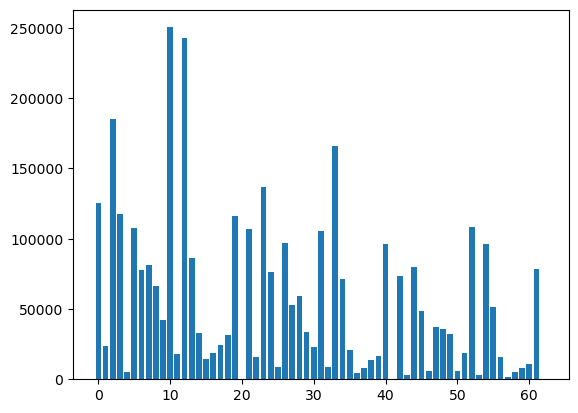

In [89]:
plt.bar([i[0] for i in enumerate(l2_hypo.sum())], l2_hypo.sum())

In [90]:
l2_hyper = pd.concat([i[1].add_suffix('_' + i[0]) for i in specie_level_2_hyper.items()], axis=1)
l2_hyper.to_csv(level2_out.format('hyper'), sep='\t')

In [91]:
l2_hypo.head()

,Astro_macaque,CLA_macaque,L23_macaque,L4_macaque,L5-ET_macaque,L5-IT_macaque,L6-CT_macaque,L6-IT_macaque,L6b_macaque,Lamp5_macaque,...,NP_mouse,ODC_mouse,OPC_mouse,Pvalb-BC_mouse,Pvalb-ChC_mouse,Sncg_mouse,Sst_mouse,Vip_mouse,Vsc_mouse,none_mouse
3,,,,,,,,,,,,,,,,,,,,,
human_orig_1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
human_orig_2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
human_orig_3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
human_orig_4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
human_orig_5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [92]:
l2_hypo.sum()

Astro_macaque    125675
CLA_macaque       23793
L23_macaque      185398
L4_macaque       117886
L5-ET_macaque      5413
                  ...  
Sncg_mouse         5006
Sst_mouse          8174
Vip_mouse         10750
Vsc_mouse         78423
none_mouse           91
Length: 63, dtype: int64

# aggregate hypo dmrs

In [93]:
clusts

array(['Astro', 'CLA', 'L23', 'L4', 'L5-ET', 'L5-IT', 'L6-CT', 'L6-IT',
       'L6b', 'Lamp5', 'MG', 'NP', 'ODC', 'OPC', 'Pvalb-BC', 'Pvalb-ChC',
       'Sncg', 'Sst', 'Vip', 'Vsc', 'none'], dtype='<U9')

In [94]:
for clust in clusts[:-1]:
    l2_hypo['mammal_' + clust + '_level2'] = (l2_hypo[clust + '_macaque'] &
                                              l2_hypo[clust + '_marmoset'] &
                                              l2_hypo[clust + '_mouse'] )
    l2_hypo['primate_' + clust + '_level2'] = (l2_hypo[clust + '_macaque'] &
                                              l2_hypo[clust + '_marmoset'])

In [95]:
l2_hypo['mammal_level2'] = l2_hypo[['mammal_{}_level2'.format(i) for i in clusts[:-1]]].sum(axis=1) > 0

In [96]:
l2_hypo['primate_level2'] = l2_hypo[['primate_{}_level2'.format(i) for i in clusts[:-1]]].sum(axis=1) > 0

In [97]:
l2_hypo['mammal_level2'].sum()

132606

In [98]:
l2_hypo['primate_level2'].sum()

327398

In [99]:
l2_hypo['mammal_level2'].sum()

132606

# aggregate hyper dmrs

In [100]:
for clust in clusts[:-1]:
    l2_hyper['mammal_' + clust + '_level2'] = (l2_hyper[clust + '_macaque'] &
                                              l2_hyper[clust + '_marmoset'] &
                                              l2_hyper[clust + '_mouse'] )
    l2_hyper['primate_' + clust + '_level2'] = (l2_hyper[clust + '_macaque'] &
                                              l2_hyper[clust + '_marmoset'])

In [101]:
l2_hyper['mammal_level2'] = l2_hyper[['mammal_{}_level2'.format(i) for i in clusts[:-1]]].sum(axis=1) > 0

In [102]:
l2_hyper['primate_level2'] = l2_hyper[['primate_{}_level2'.format(i) for i in clusts[:-1]]].sum(axis=1) > 0

In [103]:
l2_hyper['mammal_level2'].sum()

72844

In [104]:
l2_hyper['primate_level2'].sum()

177467

In [105]:
hyper_not_hypo_primate = l2_hyper.index[l2_hyper['primate_level2']][~l2_hyper.index[l2_hyper['primate_level2']].isin(l2_hypo.index[l2_hypo['primate_level2']])]

In [106]:
len(hyper_not_hypo_primate)

16313

In [107]:
hyper_not_hypo_mammal = l2_hyper.index[l2_hyper['mammal_level2']][~l2_hyper.index[l2_hyper['mammal_level2']].isin(l2_hypo.index[l2_hypo['mammal_level2']])]

In [108]:
mammal_level2 = l2_hypo['mammal_level2'] | l2_hyper['mammal_level2']

In [109]:
mammal_level2.sum()

144156

In [110]:
primate_level2 = l2_hypo['primate_level2'] | l2_hyper['primate_level2']

In [111]:
primate_level2.sum()

343711

# add level 2

In [112]:
# dmrs = pd.read_csv('../../data/outs/dmrs_level1.tsv', sep='\t')

In [113]:
dmrs.head()

,0,1,2,3,mammal_level0,primate_level0,human_specific,macaque_level1,marmoset_level1,mouse_level1,mammal_level1,primate_level1
shortname,,,,,,,,,,,,
chr1:14699:14710,chr1,14699,14710,human_orig_1,False,False,False,False,False,False,False,False
chr1:54489:54649,chr1,54489,54649,human_orig_2,False,False,False,False,False,False,False,False
chr1:56298:56305,chr1,56298,56305,human_orig_3,False,False,False,False,False,False,False,False
chr1:87723:87754,chr1,87723,87754,human_orig_4,False,False,False,False,False,False,False,False
chr1:91059:91550,chr1,91059,91550,human_orig_5,False,False,False,False,False,False,False,False


In [114]:
dmrs

,0,1,2,3,mammal_level0,primate_level0,human_specific,macaque_level1,marmoset_level1,mouse_level1,mammal_level1,primate_level1
shortname,,,,,,,,,,,,
chr1:14699:14710,chr1,14699,14710,human_orig_1,False,False,False,False,False,False,False,False
chr1:54489:54649,chr1,54489,54649,human_orig_2,False,False,False,False,False,False,False,False
chr1:56298:56305,chr1,56298,56305,human_orig_3,False,False,False,False,False,False,False,False
chr1:87723:87754,chr1,87723,87754,human_orig_4,False,False,False,False,False,False,False,False
chr1:91059:91550,chr1,91059,91550,human_orig_5,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
chrY:56734250:56734405,chrY,56734250,56734405,human_orig_1361954,False,False,True,False,False,False,False,False
chrY:56858113:56858212,chrY,56858113,56858212,human_orig_1361955,False,False,False,False,False,False,False,False
chrY:56866723:56866730,chrY,56866723,56866730,human_orig_1361956,False,False,False,False,False,False,False,False


In [115]:
dmrs = dmrs.set_index(3)

In [116]:
for clust in clusts[:-1]:
    dmrs['mammal_' + clust + '_level2'] = l2_hypo['mammal_' + clust + '_level2'] | l2_hyper['mammal_' + clust + '_level2']
    dmrs['primate_' + clust + '_level2'] = l2_hypo['primate_' + clust + '_level2'] | l2_hyper['primate_' + clust + '_level2']

In [117]:
dmrs.head()

,0,1,2,mammal_level0,primate_level0,human_specific,macaque_level1,marmoset_level1,mouse_level1,mammal_level1,...,mammal_Pvalb-ChC_level2,primate_Pvalb-ChC_level2,mammal_Sncg_level2,primate_Sncg_level2,mammal_Sst_level2,primate_Sst_level2,mammal_Vip_level2,primate_Vip_level2,mammal_Vsc_level2,primate_Vsc_level2
3,,,,,,,,,,,,,,,,,,,,,
human_orig_1,chr1,14699,14710,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
human_orig_2,chr1,54489,54649,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
human_orig_3,chr1,56298,56305,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
human_orig_4,chr1,87723,87754,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
human_orig_5,chr1,91059,91550,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [118]:
dmrs['hyper_not_hypo_mammal'] = dmrs.index.isin(hyper_not_hypo_mammal)
dmrs['hyper_not_hypo_primate'] = dmrs.index.isin(hyper_not_hypo_primate)

In [119]:
dmrs.shape

(1361958, 53)

In [120]:
dmrs.head()

,0,1,2,mammal_level0,primate_level0,human_specific,macaque_level1,marmoset_level1,mouse_level1,mammal_level1,...,mammal_Sncg_level2,primate_Sncg_level2,mammal_Sst_level2,primate_Sst_level2,mammal_Vip_level2,primate_Vip_level2,mammal_Vsc_level2,primate_Vsc_level2,hyper_not_hypo_mammal,hyper_not_hypo_primate
3,,,,,,,,,,,,,,,,,,,,,
human_orig_1,chr1,14699,14710,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
human_orig_2,chr1,54489,54649,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
human_orig_3,chr1,56298,56305,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
human_orig_4,chr1,87723,87754,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
human_orig_5,chr1,91059,91550,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [121]:
dmrs.to_csv('../../data/dmrs_level2_outs.tsv', sep='\t')

In [122]:
dmrs.head()

,0,1,2,mammal_level0,primate_level0,human_specific,macaque_level1,marmoset_level1,mouse_level1,mammal_level1,...,mammal_Sncg_level2,primate_Sncg_level2,mammal_Sst_level2,primate_Sst_level2,mammal_Vip_level2,primate_Vip_level2,mammal_Vsc_level2,primate_Vsc_level2,hyper_not_hypo_mammal,hyper_not_hypo_primate
3,,,,,,,,,,,,,,,,,,,,,
human_orig_1,chr1,14699,14710,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
human_orig_2,chr1,54489,54649,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
human_orig_3,chr1,56298,56305,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
human_orig_4,chr1,87723,87754,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
human_orig_5,chr1,91059,91550,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [123]:
dmrs.mammal_level1.sum()

195435

In [124]:
dmrs.marmoset_level1.sum()

504924

In [125]:
dmrs.mouse_level1.sum()

365984

In [126]:
dmrs.macaque_level1.sum()

664352

In [138]:
dmrs['primate_level1'].sum()

371964

In [129]:
dmrs.hyper_not_hypo_primate.sum()

16313

In [131]:
[i for i in dmrs.columns if ('level2' in str(i)) & ('mammal' in str(i))]

['mammal_Astro_level2',
 'mammal_CLA_level2',
 'mammal_L23_level2',
 'mammal_L4_level2',
 'mammal_L5-ET_level2',
 'mammal_L5-IT_level2',
 'mammal_L6-CT_level2',
 'mammal_L6-IT_level2',
 'mammal_L6b_level2',
 'mammal_Lamp5_level2',
 'mammal_MG_level2',
 'mammal_NP_level2',
 'mammal_ODC_level2',
 'mammal_OPC_level2',
 'mammal_Pvalb-BC_level2',
 'mammal_Pvalb-ChC_level2',
 'mammal_Sncg_level2',
 'mammal_Sst_level2',
 'mammal_Vip_level2',
 'mammal_Vsc_level2']

In [139]:
dmrs['mammal_level2'] = dmrs[[i for i in dmrs.columns if ('level2' in str(i)) & ('mammal' in str(i))]].sum(axis=1) >0

In [140]:
dmrs['primate_level2'] =dmrs[[i for i in dmrs.columns if ('level2' in str(i)) & ('primate' in str(i))]].sum(axis=1) >0

In [141]:
dmrs.to_csv('../../data/dmrs_march_outs.tsv')

In [142]:
dmrs.to_csv('../../data/dmrs_march_outs.tsv', sep='\t')